In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('data/cleaned_merged_seasons.csv')

C:\Users\johnm\AppData\Local\Temp\ipykernel_23600\2416074750.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/cleaned_merged_seasons.csv')


In [5]:
df.shape

(98402, 38)

In [6]:
df['cumulative_points'] = df[['name','season_x','total_points']].groupby(['name', 'season_x']).cumsum()
df['cumulative_goals'] = df[['name','season_x','goals_scored']].groupby(['name', 'season_x']).cumsum()
df['cumulative_assists'] = df[['name','season_x','assists']].groupby(['name', 'season_x']).cumsum()
df.shape

(98402, 41)

In [9]:
filter_df = df[df['GW'] == 38]
print(filter_df.shape)

(2350, 41)


In [10]:
pd.crosstab(filter_df["value"], filter_df["cumulative_points"])

cumulative_points,-3,-1,0,1,2,3,4,5,6,7,...,213,228,231,234,242,244,255,259,265,273
value,,,,,,,,,,,,,,,,,,,,,
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,4,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,41,6,3,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
40,1,0,115,8,4,3,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41,0,0,2,3,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
filter_df.pivot_table(
    ["cumulative_points", "transfers_in", "value"],
    ["position"],
    aggfunc="mean",
)

,cumulative_points,transfers_in,value
position,,,
DEF,47.855422,6461.825301,46.573494
FWD,55.556604,15523.003145,61.867925
GK,41.957854,5042.321839,44.590038
MID,52.105207,9009.012752,54.091392


In [12]:
columns_to_show = ["value", "cumulative_points", "bps"]

filter_df.groupby(["name"])[columns_to_show].describe(percentiles=[])

value                                         \
                      count       mean       std   min   50%   max   
name                                                                 
Aaron Connolly          2.0  52.500000  0.707107  52.0  52.5  53.0   
Aaron Cresswell         5.0  52.200000  3.271085  49.0  51.0  57.0   
Aaron Lennon            4.0  51.000000  4.242641  46.0  51.5  55.0   
Aaron Mooy              3.0  50.666667  1.154701  50.0  50.0  52.0   
Aaron Ramsdale          4.0  44.250000  5.315073  40.0  43.0  51.0   
...                     ...        ...       ...   ...   ...   ...   
Zak Swanson             1.0  40.000000       NaN  40.0  40.0  40.0   
Zeze Steven Sessegnon   2.0  41.500000  2.121320  40.0  41.5  43.0   
Álvaro Fernández        2.0  42.500000  3.535534  40.0  42.5  45.0   
Çaglar Söyüncü          3.0  50.000000  2.645751  48.0  49.0  53.0   
Ørjan Nyland            1.0  40.000000       NaN  40.0  40.0  40.0   

                      cumulative_points                                    \
                                  count       mean        std   min   50%   
name                                                                        
Aaron Connolly                      2.0  21.500000  23.334524   5.0  21.5   
Aaron Cresswell                     5.0  89.800000  47.415187  34.0  94.0   
Aaron Lennon                        4.0  46.500000  19.192012  22.0  49.5   
Aaron Mooy                          3.0  57.333333  50.649120   0.0  76.0   
Aaron Ramsdale                      4.0  64.000000  74.013512   0.0  61.5   
...                                 ...        ...        ...   ...   ...   
Zak Swanson                         1.0   0.000000        NaN   0.0   0.0   
Zeze Steven Sessegnon               2.0   0.000000   0.000000   0.0   0.0   
Álvaro Fernández                    2.0  31.000000   0.000000  31.0  31.0   
Çaglar Söyüncü                      3.0  42.333333  35.104606   2.0  59.0   
Ørjan Nyland                        1.0   0.000000        NaN   0.0   0.0   

                               bps                                         
                         max count       mean        std  min   50%   max  
name                                                                       
Aaron Connolly          38.0   2.0   1.500000   2.121320  0.0   1.5   3.0  
Aaron Cresswell        153.0   5.0  12.200000  10.756393  0.0  11.0  29.0  
Aaron Lennon            65.0   4.0   2.500000   3.316625  0.0   1.5   7.0  
Aaron Mooy              96.0   3.0  10.000000   8.717798  0.0  14.0  16.0  
Aaron Ramsdale         133.0   4.0   9.750000  14.150972  0.0   4.5  30.0  
...                      ...   ...        ...        ...  ...   ...   ...  
Zak Swanson              0.0   1.0   0.000000        NaN  0.0   0.0   0.0  
Zeze Steven Sessegnon    0.0   2.0   0.000000   0.000000  0.0   0.0   0.0  
Álvaro Fernández        31.0   2.0   0.000000   0.000000  0.0   0.0   0.0  
Çaglar Söyüncü          66.0   3.0   5.333333   9.237604  0.0   0.0  16.0  
Ørjan Nyland             0.0   1.0   0.000000        NaN  0.0   0.0   0.0  

[989 rows x 18 columns]

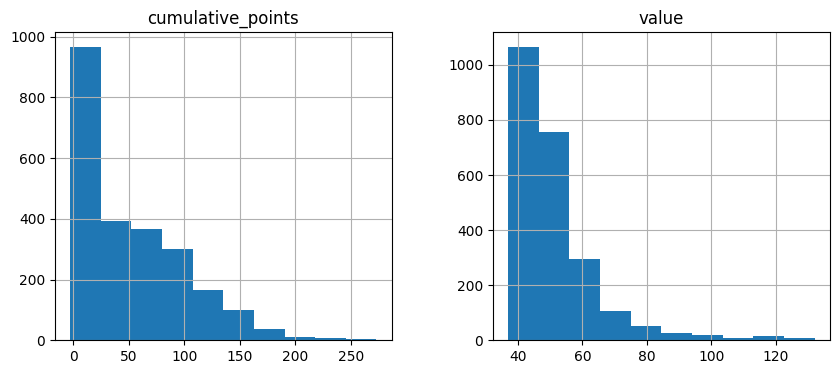

In [14]:
features = ["cumulative_points", "value"]
filter_df[features].hist(figsize=(10, 4));

ModuleNotFoundError: No module named 'scipy'

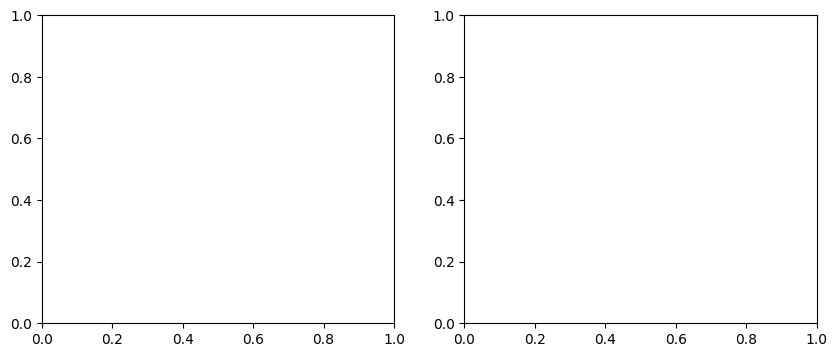

In [15]:
filter_df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

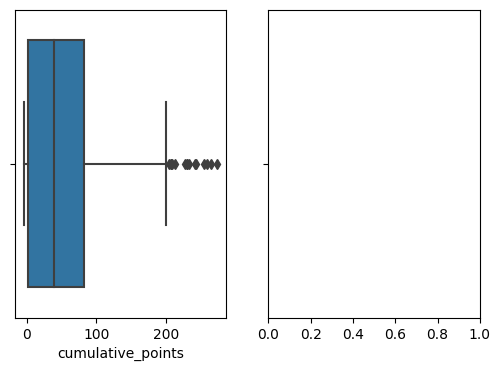

In [17]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="cumulative_points", data=filter_df, ax=axes[0]);
# sns.violinplot(data=filter_df["cumulative_points"], ax=axes[1]);

In [18]:
filter_df[features].describe()

,cumulative_points,value
count,2350.000000,2350.000000
mean,49.944255,51.433191
std,49.630228,13.028786
min,-3.000000,37.000000
25%,2.000000,44.000000
50%,39.000000,47.000000
75%,82.000000,55.000000
max,273.000000,132.000000


In [19]:
highest_points = filter_df[filter_df['cumulative_points']>=200]
highest_points.head()

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,cumulative_points,cumulative_goals,cumulative_assists
6759,6759,2016-17,Harry Kane,FWD,NaN,0,3,83,0,20.4,...,149800,156641,6841,119,False,0,38,209,27,7
17110,17110,2017-18,Mohamed Salah,MID,NaN,1,0,32,1,38.6,...,160600,175619,15019,106,True,0,38,273,29,12
31837,31837,2018-19,Andrew Robertson,DEF,NaN,0,0,29,1,14.8,...,-260556,10722,271278,67,True,0,38,213,0,12
32077,32077,2018-19,Mohamed Salah,MID,NaN,0,0,4,1,3.5,...,-123436,35332,158768,132,True,0,38,259,22,12
32105,32105,2018-19,Pierre-Emerick Aubameyang,MID,NaN,0,3,47,0,3.6,...,47790,72259,24469,108,False,0,38,205,22,7


In [20]:
df["value"].value_counts()

45     13146
44      7654
50      6399
43      5889
40      5388
       ...  
132       12
133       10
136        5
135        2
134        2
Name: value, Length: 100, dtype: int64

This is the correlation matrix for only the relevant features. Relevancy was found through trial and error of correlation matrices.

C:\Users\johnm\AppData\Local\Temp\ipykernel_20548\551360621.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[relevant_features].corr()


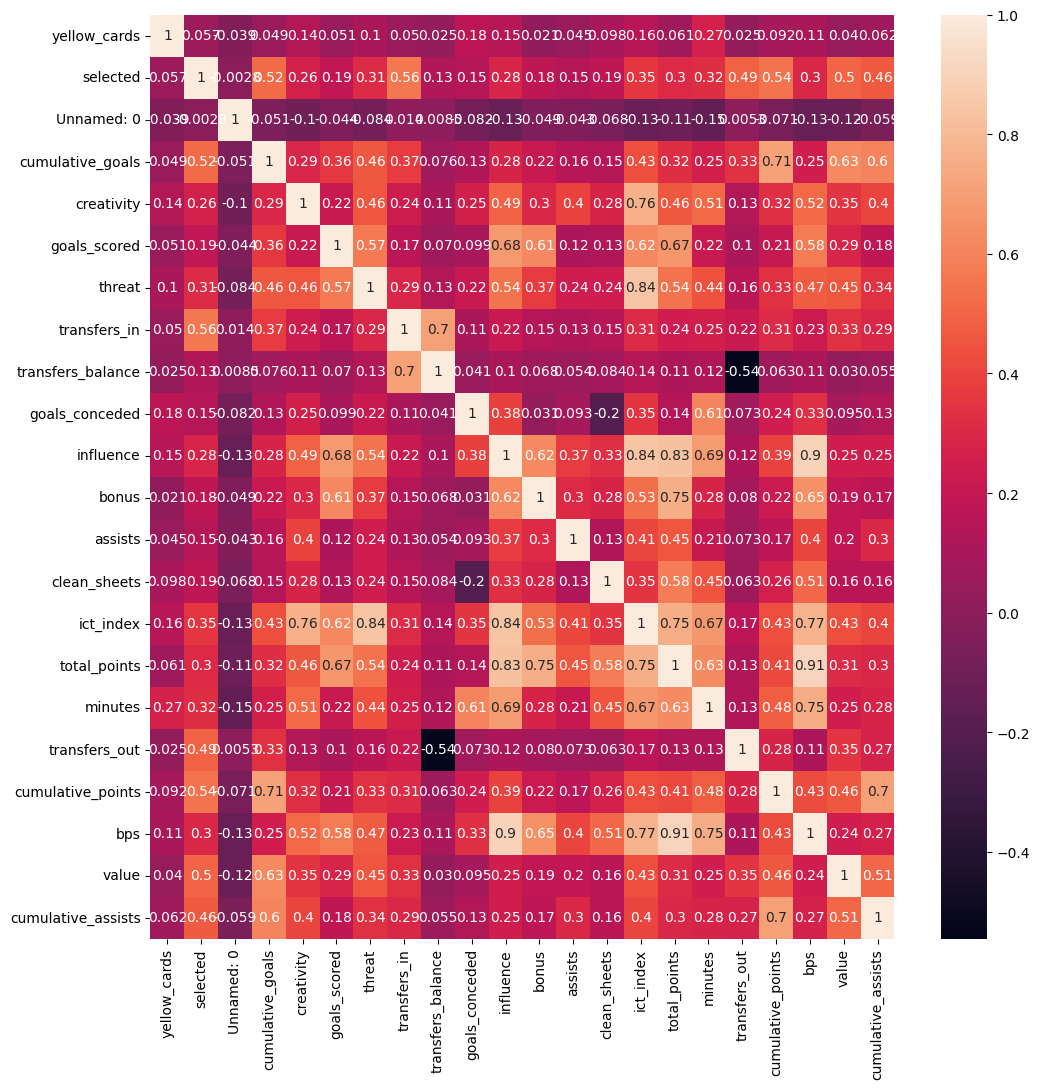

In [21]:
# Drop non-numerical variables
relevant_features = list(
    set(df.columns)
    - {
        "name",
        "team",
        "was_home",
        "team_a_score",
        "GW",
        "round",
        "fixture",
        "element",
        "saves",
        "team_h_score",
        "own_goals",
        "saves",
        "opponent_team",
        "penalties_missed",
        "penalties_saved",
        "red_cards",
        "position",
    }
)
corr_matrix = df[relevant_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr_matrix,ax=axes, annot=True);

This is the correlation matrix for all players where gw = 0

C:\Users\johnm\AppData\Local\Temp\ipykernel_20548\4224743471.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1_matrix = df_gw1[gw1_rel_features].corr()


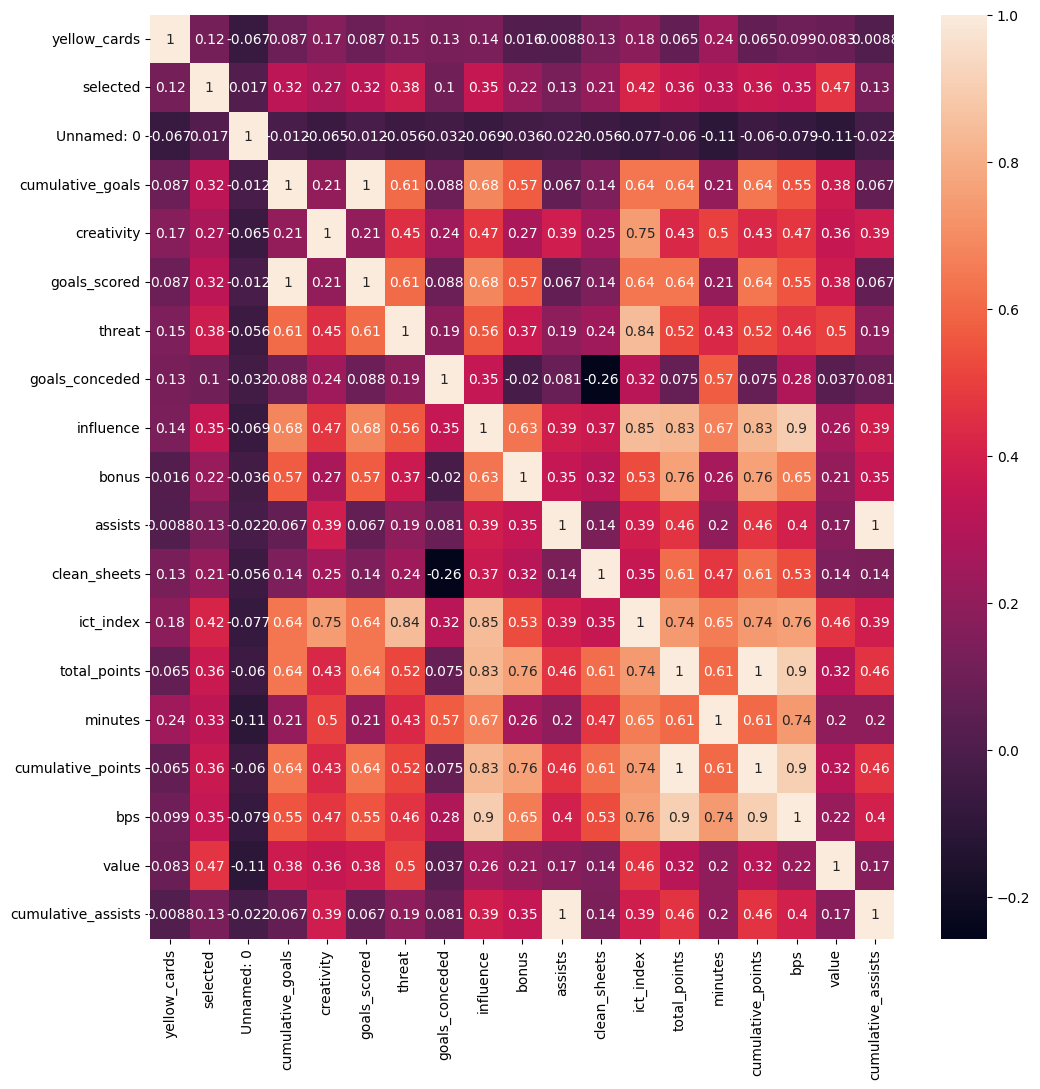

In [22]:
gw1_rel_features = list(
    set(relevant_features)
    - {
        'starts',
        'expected_goal_involvements',
        'expected_goals',
        'transfers_balance',
        'expected_assists',
        'expected_goals_conceded',
        'transfers_out',
        'transfers_in'
    }
)

df_gw1 = df.loc[df['GW'] == 1]
corr1_matrix = df_gw1[gw1_rel_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr1_matrix,ax=axes, annot=True);

C:\Users\johnm\AppData\Local\Temp\ipykernel_20548\2360506500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = filter_df[relevant_features].corr()


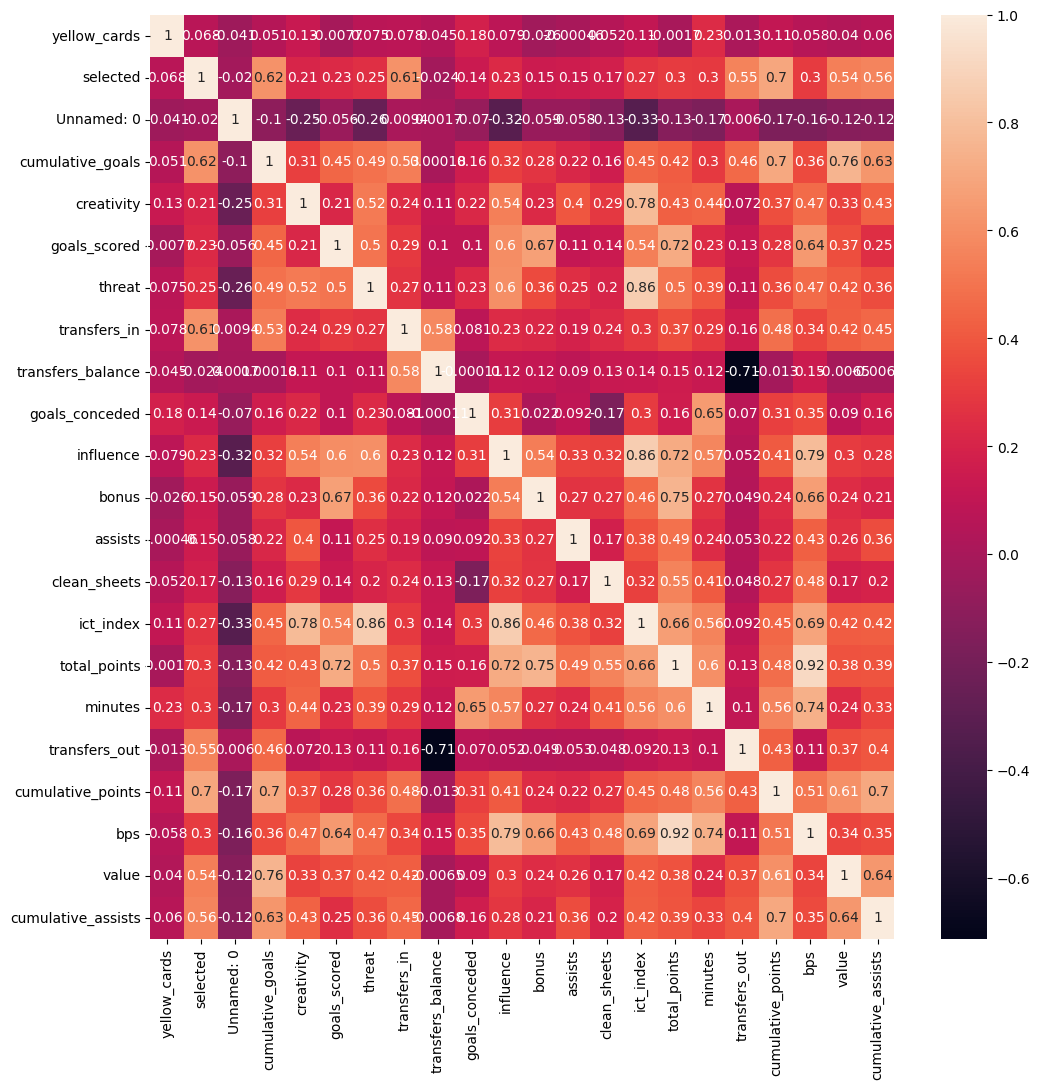

In [23]:
corr_matrix = filter_df[relevant_features].corr()
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
sns.heatmap(corr_matrix,ax=axes, annot=True);

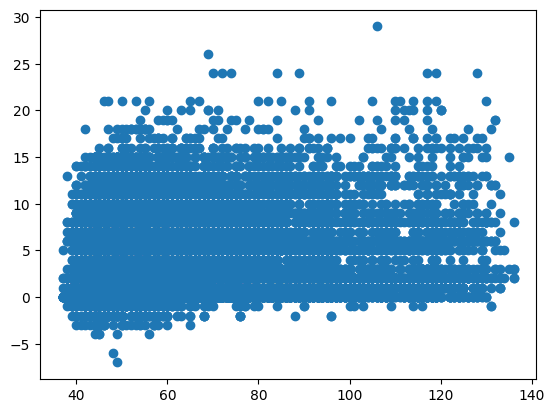

In [24]:
plt.scatter(df["value"], df["total_points"]);

In [26]:
sns.jointplot(
    "total_points", "value", data=df, kind="kde", color="b"
);

TypeError: jointplot() got multiple values for argument 'data'

In [27]:
sns.lmplot(
    "total_points", "value", data=df, hue="position", fit_reg=False
);

TypeError: lmplot() got multiple values for argument 'data'

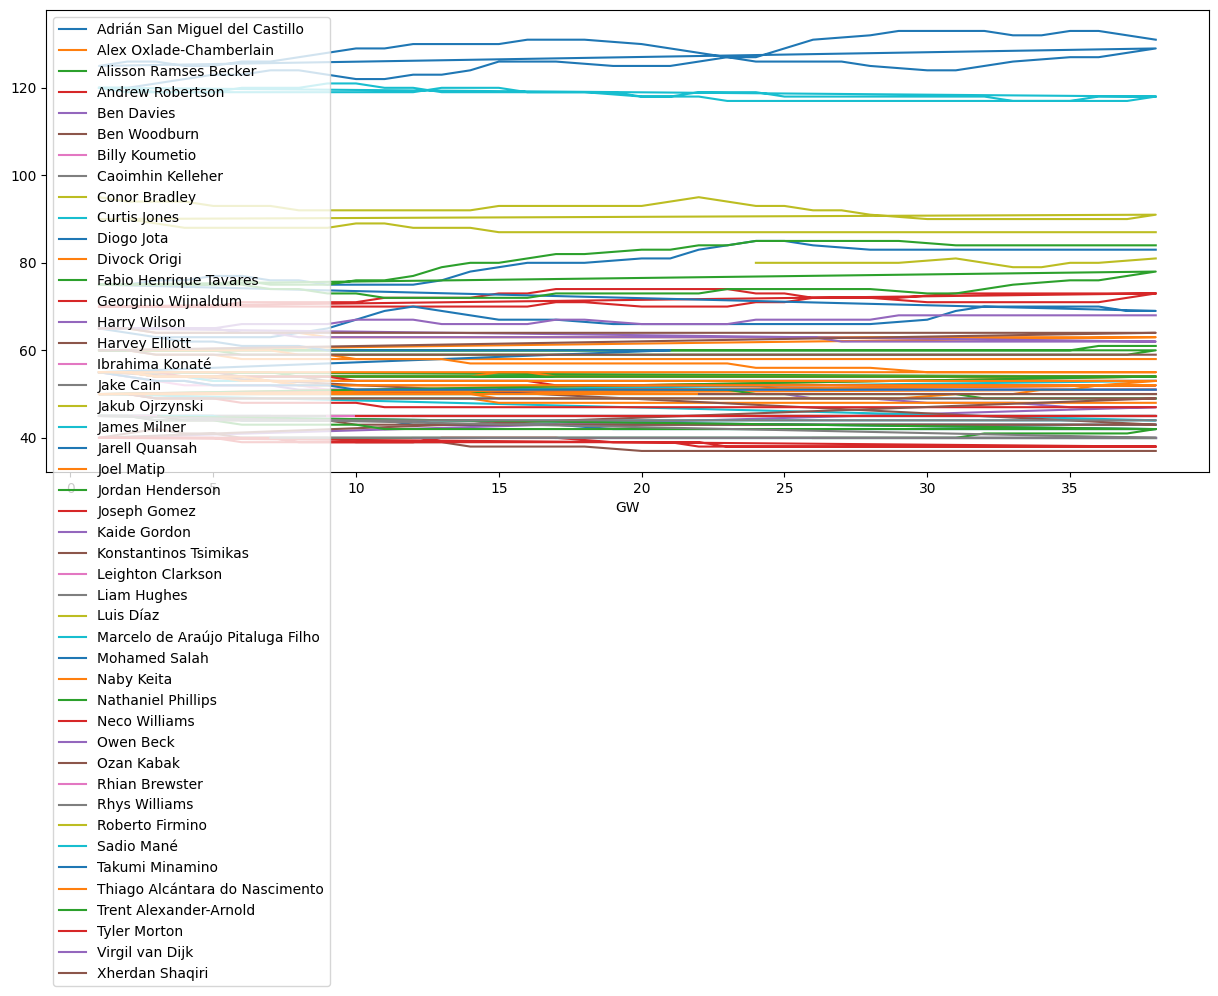

In [28]:
#time_series = df[df['team_x'] == "Wolves", df['season_x'] == "2021-22"]
# salah = df[df['team_x'] == "Liverpool"]
# value = salah['value'].groupby(salah['name'])
# value.index = salah['GW']

# value.plot(figsize=(15, 6))
# plt.show()

salah = df[df['team_x'] == "Liverpool"]
grouped = salah.groupby('name')

fig, ax = plt.subplots(figsize=(15, 6))

for name, group in grouped:
    ts = group.set_index('GW')['value']
    ts.plot(label=name, ax=ax)

plt.legend()
plt.show()


In [11]:
print(df.columns)
pd.set_option("display.max_columns", None)
df.head(10)

NameError: name 'df' is not defined

In [3]:
#commands to read all the csv files we will use
df1617 = pd.read_csv('data/2016-17/gws/merged_gw.csv', encoding_errors='ignore')
df1617.shape
df1718 = pd.read_csv('data/2017-18/gws/merged_gw.csv', encoding_errors='ignore')
df1718.shape
df1819 = pd.read_csv('data/2018-19/gws/merged_gw.csv', encoding_errors='ignore')
df1819.shape
df1920 = pd.read_csv('data/2019-20/gws/merged_gw.csv', encoding_errors='ignore')
df1920.shape
df2021 = pd.read_csv('data/2020-21/gws/merged_gw.csv', encoding_errors='ignore')
df2021.shape
df2122 = pd.read_csv('data/2021-22/gws/merged_gw.csv', encoding_errors='ignore')
df2122.shape
df2223 = pd.read_csv('data/2022-23/gws/merged_gw.csv', encoding_errors='ignore')
df2223.shape

(15120, 41)

In [12]:
pd.set_option("display.max_columns", None)
df1718.head(20)

,name,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,dribbles,ea_index,element,errors_leading_to_goal,errors_leading_to_goal_attempt,fixture,fouls,goals_conceded,goals_scored,ict_index,id,influence,key_passes,kickoff_time,kickoff_time_formatted,loaned_in,loaned_out,minutes,offside,open_play_crosses,opponent_team,own_goals,penalties_conceded,penalties_missed,penalties_saved,recoveries,red_cards,round,saves,selected,tackled,tackles,target_missed,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards,GW
0,Aaron_Cresswell,0,10,0,0,0,3,0,0,9,0.6,0,0,443,0,0,9,0,2,0,1.9,443,0.4,0,2017-08-13T15:00:00Z,13 Aug 16:00,0,0,9,0,0,12,0,0,0,0,0,0,1,0,25136,0,0,0,0,4,18,0,0,0,0,50,False,0,0,1
1,Aaron_Lennon,0,0,0,0,0,0,0,0,0,0.0,0,0,153,0,0,5,0,0,0,0.0,153,0.0,0,2017-08-12T14:00:00Z,12 Aug 15:00,0,0,0,0,0,15,0,0,0,0,0,0,1,0,4681,0,0,0,0,1,0,0,0,0,0,55,True,0,0,1
2,Aaron_Mooy,1,52,0,0,0,22,1,5,41,46.9,0,0,172,0,0,4,0,0,0,8.7,172,40.2,3,2017-08-12T14:00:00Z,12 Aug 15:00,0,0,90,0,1,6,0,0,0,0,5,0,1,0,59955,2,0,0,3,0,0,6,0,0,0,55,False,0,0,1
3,Aaron_Ramsey,0,11,0,1,0,16,0,0,8,11.2,0,0,18,0,0,1,0,0,1,6.7,18,29.6,1,2017-08-11T18:45:00Z,11 Aug 19:45,0,0,23,0,0,9,0,0,0,0,2,0,1,0,33792,0,0,3,3,4,26,6,0,0,0,70,True,0,0,1
4,Abdoulaye_Doucour,0,73,0,0,2,36,0,3,60,25.2,3,0,414,0,0,7,2,3,1,10.9,414,48.6,2,2017-08-12T11:30:00Z,12 Aug 12:30,0,0,90,0,0,10,0,0,0,0,11,0,1,0,1207,1,1,0,3,3,35,9,0,0,0,50,True,0,0,1
5,Adam_Federici,0,0,0,0,0,0,0,0,0,0.0,0,0,31,0,0,8,0,0,0,0.0,31,0.0,0,2017-08-12T14:00:00Z,12 Aug 15:00,0,0,0,0,0,19,0,0,0,0,0,0,1,0,224542,0,0,0,0,1,0,0,0,0,0,40,False,0,0,1
6,Adam_Lallana,0,0,0,0,0,0,0,0,0,0.0,0,0,228,0,0,7,0,0,0,0.0,228,0.0,0,2017-08-12T11:30:00Z,12 Aug 12:30,0,0,0,0,0,18,0,0,0,0,0,0,1,0,45019,0,0,0,3,3,0,0,0,0,0,75,False,0,0,1
7,Adam_Smith,0,6,0,0,0,2,0,1,6,0.6,0,0,35,0,0,8,0,0,0,0.3,35,2.2,0,2017-08-12T14:00:00Z,12 Aug 15:00,0,0,10,0,0,19,0,0,0,0,0,0,1,0,50168,1,0,0,0,1,0,1,0,0,0,50,False,0,0,1
8,Ademola_Lookman,0,0,0,0,0,0,0,0,0,0.0,0,0,157,0,0,5,0,0,0,0.0,157,0.0,0,2017-08-12T14:00:00Z,12 Aug 15:00,0,0,0,0,0,15,0,0,0,0,0,0,1,0,8034,0,0,0,0,1,0,0,0,0,0,55,True,0,0,1
9,Adrian_Mariappa,0,0,0,0,0,0,0,0,0,0.0,0,0,405,0,0,7,0,0,0,0.0,405,0.0,0,2017-08-12T11:30:00Z,12 Aug 12:30,0,0,0,0,0,10,0,0,0,0,0,0,1,0,171365,0,0,0,3,3,0,0,0,0,0,40,True,0,0,1


In [15]:
#make a dataframe that will save point, goals, assists from one week and
#the price change from the price change from this week to the next week

cleanmerged = pd.read_csv('data/cleaned_merged_seasons.csv')
tmp_df = cleanmerged[["season_x", "name", "GW", "total_points","goals_scored", "goals_conceded", "assists", "transfers_balance", "minutes", "clean_sheets", "bonus", "value" ]]

# increaseDF = pd.DataFrame(columns=["name", "gameweek" "difference"])
tmp_df = tmp_df.sort_values(by=['season_x', 'name', 'GW'])
tmp_df['change'] = tmp_df.value.diff()


# When the player we are looking at changes, we do not care about the price change between these players
# So we set the value to nan so we wont have to take them into account later.

tmp_df['prev_name'] = tmp_df['name'].shift(1)
tmp_df.loc[tmp_df['name'] != tmp_df['prev_name'], 'change'] = np.nan
tmp_df.drop(columns=['prev_name'], inplace=True)
tmp_df.iloc[32150:32200]


C:\Users\johnm\AppData\Local\Temp\ipykernel_23600\2632527953.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  cleanmerged = pd.read_csv('data/cleaned_merged_seasons.csv')


,season_x,name,GW,total_points,goals_scored,goals_conceded,assists,transfers_balance,minutes,clean_sheets,bonus,value,change
23895,2018-19,Zeze Steven Sessegnon,15,0,0,0,0,103,0,0,0,40,0.0
24243,2018-19,Zeze Steven Sessegnon,16,0,0,0,0,20,0,0,0,40,0.0
24591,2018-19,Zeze Steven Sessegnon,17,0,0,0,0,182,0,0,0,40,0.0
24941,2018-19,Zeze Steven Sessegnon,18,0,0,0,0,37,0,0,0,40,0.0
25293,2018-19,Zeze Steven Sessegnon,19,0,0,0,0,49,0,0,0,40,0.0
25645,2018-19,Zeze Steven Sessegnon,20,0,0,0,0,26,0,0,0,40,0.0
25997,2018-19,Zeze Steven Sessegnon,21,0,0,0,0,-47,0,0,0,40,0.0
26351,2018-19,Zeze Steven Sessegnon,22,0,0,0,0,42,0,0,0,40,0.0
26705,2018-19,Zeze Steven Sessegnon,23,0,0,0,0,-82,0,0,0,40,0.0
27061,2018-19,Zeze Steven Sessegnon,24,0,0,0,0,90,0,0,0,40,0.0
